### k近邻 KNN

> 理论 《统计学习方法》第三章 k近邻法
> 
> 代码 numpy version && torch version
>
> Python3.7

可以回归也可以分类。

其实就是根据新的样本点到训练集中样本距离选出最相近的K个实例，然后进行多数表决

KNN其实并不需要训练，每次预测都是遍历整个数据集

三要素：距离度量，K值选择，分类决策规则

#### 距离度量

$L_p$距离，常用的就是欧式距离

然后余弦...

#### 分类决策规则

多数表决啥的

#### KNN的实现：KD树

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
def draw_fig(x,y):
    plt.figure(dpi=64,figsize=(4,4))

    # 正负实例的散点图，这儿使用了一个Bool索引，切片混合索引
    # plt.scatter(x[y==1][:,0],x[y==1][:,1],color='r')
    # plt.scatter(x[y==0][:,0],x[y==0][:,1],color='g')
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.show()

(200, 2)


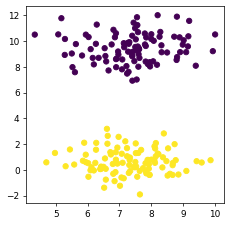

In [3]:
x_train = np.array([[3.,3.],[4,3],[5,5],[1,1],[0,0],[1,0],[4,2]])
y_train = np.array([1,1,1,0,0,0,1])

x_train,y_train = make_blobs(n_samples=200,n_features=2,centers=2,random_state=8)
print(x_train.shape)
draw_fig(x_train,y_train)

numpy实现的简单KNN分类与回归

In [4]:
"""
numpy实现的简单KNN分类与回归
"""

# 计算欧式距离
def CalcDistance(x,y):
    return np.sqrt(np.sum( (x-y)**2, axis=1) )

# 返回排序好的距离和对应索引
def getSortedDistance(x,y):
    """
    x: 训练样本集
    y: 需要新分类的样本点
    """
    dlist = CalcDistance(x,np.array(y))
    index = np.argsort(dlist)
    dlist.sort()
    return dlist,index

# 用于分类的KNN，采用前K个多数表决的方法
def KNNCla(x,y,v,k=3):
    dlist,index = getSortedDistance(x,v)
    yhat = y[index[:k]] # 距离相近前K个的标签
    yhat = np.argmax(np.bincount(yhat)) # 找到出现最多次数的那个标签
    return yhat

# 用于回归
def KNNReg(x,y,v,k=3):
    dlist,index = getSortedDistance(x,v)
    yhat = 0
    for i in range(k):
        yhat += y[index[i]]
    yhat /= k
    return yhat

sample = [2,8]
print("分类任务：{} label {}".format(sample,KNNCla(x_train,y_train,sample)))
print("回归任务：{} label {:.4f}".format(sample,KNNReg(x_train,y_train,sample)))

分类任务：[2, 8] label 0
回归任务：[2, 8] label 0.0000


In [5]:
x_t = torch.from_numpy(x_train).float()
y_t = torch.from_numpy(y_train).float()
s_t = torch.Tensor([[2,2],[5,5]]).float()
sl_t = torch.Tensor([0,0]).float()

def cal_distance(x,y):
    return torch.sum((x-y)**2)*0.5

# 基于torch矩阵计算实现的KNN，x,y是训练的样本数据集，s是要预测的,sl是预测的正确标签
def KNNtorch(x,y,s,k=3):
    m = s.size(0)
    n = x.size(0)
    xx = (s**2).sum(dim=1,keepdim=True).expand(m,n)
    yy = (x**2).sum(dim=1,keepdim=True).expand(n,m).transpose(0,1)
    dist_mat = xx + yy - 2*s.matmul(x.transpose(0,1))
    mink_idxs = dist_mat.argsort(dim=-1)
    res = []
    
    for idxs in mink_idxs:
        yhat = y[idxs[:k]] # 距离相近前K个的标签
        yhat = np.argmax(np.bincount(yhat)) # 找到出现最多次数的那个标签
        res.append(yhat)
    return res

KNNtorch(x_t,y_t,s_t)

[1, 1]

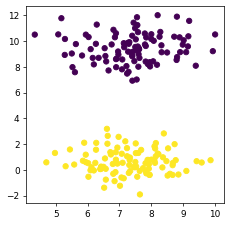

In [6]:
x,y = make_blobs(n_samples=200,centers=2,random_state=8)
draw_fig(x,y)

### 使用sklearn实现KNN

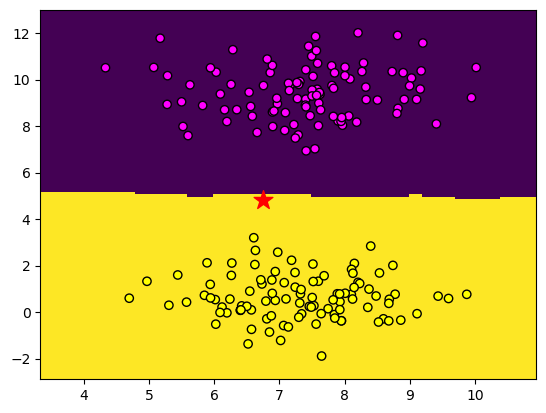

In [7]:
clf = KNeighborsClassifier()
clf.fit(x,y)

x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,.1),np.arange(y_min,y_max,.1))
# print(len(xx))
# print(xx.shape)
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

test_x = [6.75,4.82]
plt.scatter(test_x[0],test_x[1],marker='*',c='r',s=200)
plt.show()

In [8]:
print('predict ',clf.predict([test_x]))

predict  [1]


#### sklearn KNN处理多分类

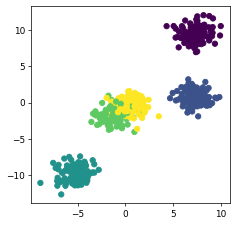

In [9]:
x,y = make_blobs(n_samples=500,centers=5,random_state=8)
draw_fig(x,y)

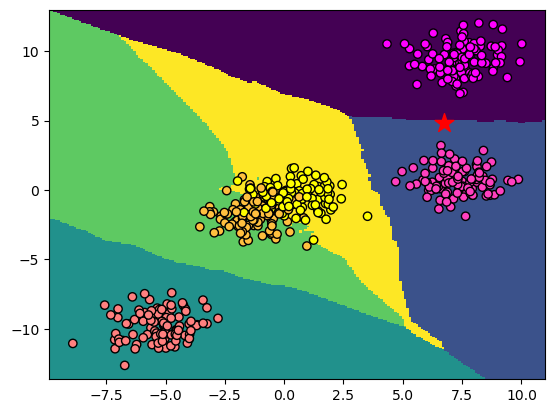

In [10]:
clf = KNeighborsClassifier()
clf.fit(x,y)

x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,.1),np.arange(y_min,y_max,.1))
# print(len(xx))
# print(xx.shape)
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

test_x = [6.75,4.82]
plt.scatter(test_x[0],test_x[1],marker='*',c='r',s=200)
plt.show()


In [11]:
print('acc {:.4f}'.format(clf.score(x,y)))

acc 0.9560


#### KNN 回归

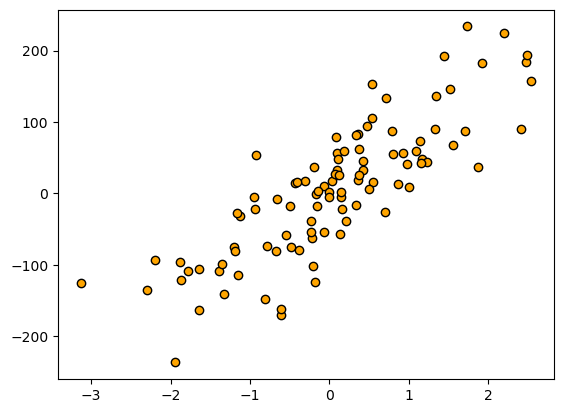

In [12]:
from sklearn.datasets import  make_regression

x,y = make_regression(n_features=1,n_informative=1,noise=50,random_state=8)
plt.scatter(x,y,c='orange',edgecolors='k')
plt.show()

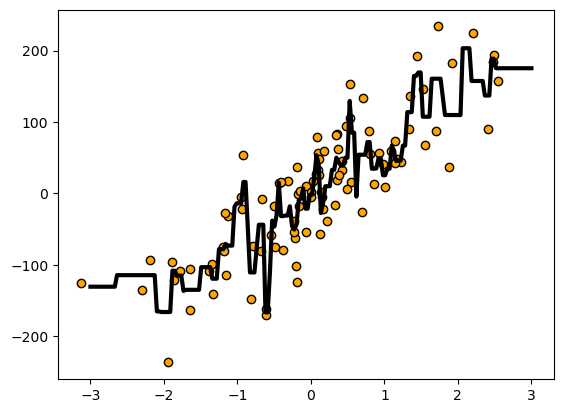

In [13]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(x,y)
z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(x,y,c='orange',edgecolor='k')
plt.plot(z,reg.predict(z),c='k',linewidth=3)
plt.show()

In [14]:
print('score {:.4f}'.format(reg.score(x,y)))

score 0.8582
